<a href="https://colab.research.google.com/github/RohitSen1235/DataAnalysisAndML/blob/main/FeatureEngineering_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
!ls "/content/drive/My Drive/AI&ML/FeatureEngineering"

 concrete.csv			   'Project- FMT- Problem Statment.gdoc'
 featureengineering_project.html   'Project- FMT- Problem Statment.pdf'
 FeatureEngineering_Project.ipynb


In [ ]:
% matplotlib inline 
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.model_selection  import train_test_split
from scipy.stats import zscore
from sklearn import metrics
from sklearn import svm
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso



In [ ]:
data=pd.read_csv("/content/drive/My Drive/AI&ML/FeatureEngineering/concrete.csv")
data.shape


(1030, 9)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


### **All attributes are numerical in nature and at first look data does not seem to have any missing entries**

In [ ]:
data.describe().transpose()



,count,mean,std,min,25%,50%,75%,max
cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
slag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
ash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
superplastic,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
coarseagg,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
fineagg,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
strength,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


## **There are significant amount of ZERO entries in columns "slag" , "ash" and "superplastic" .**
##**These entries may not be reliable for model building**

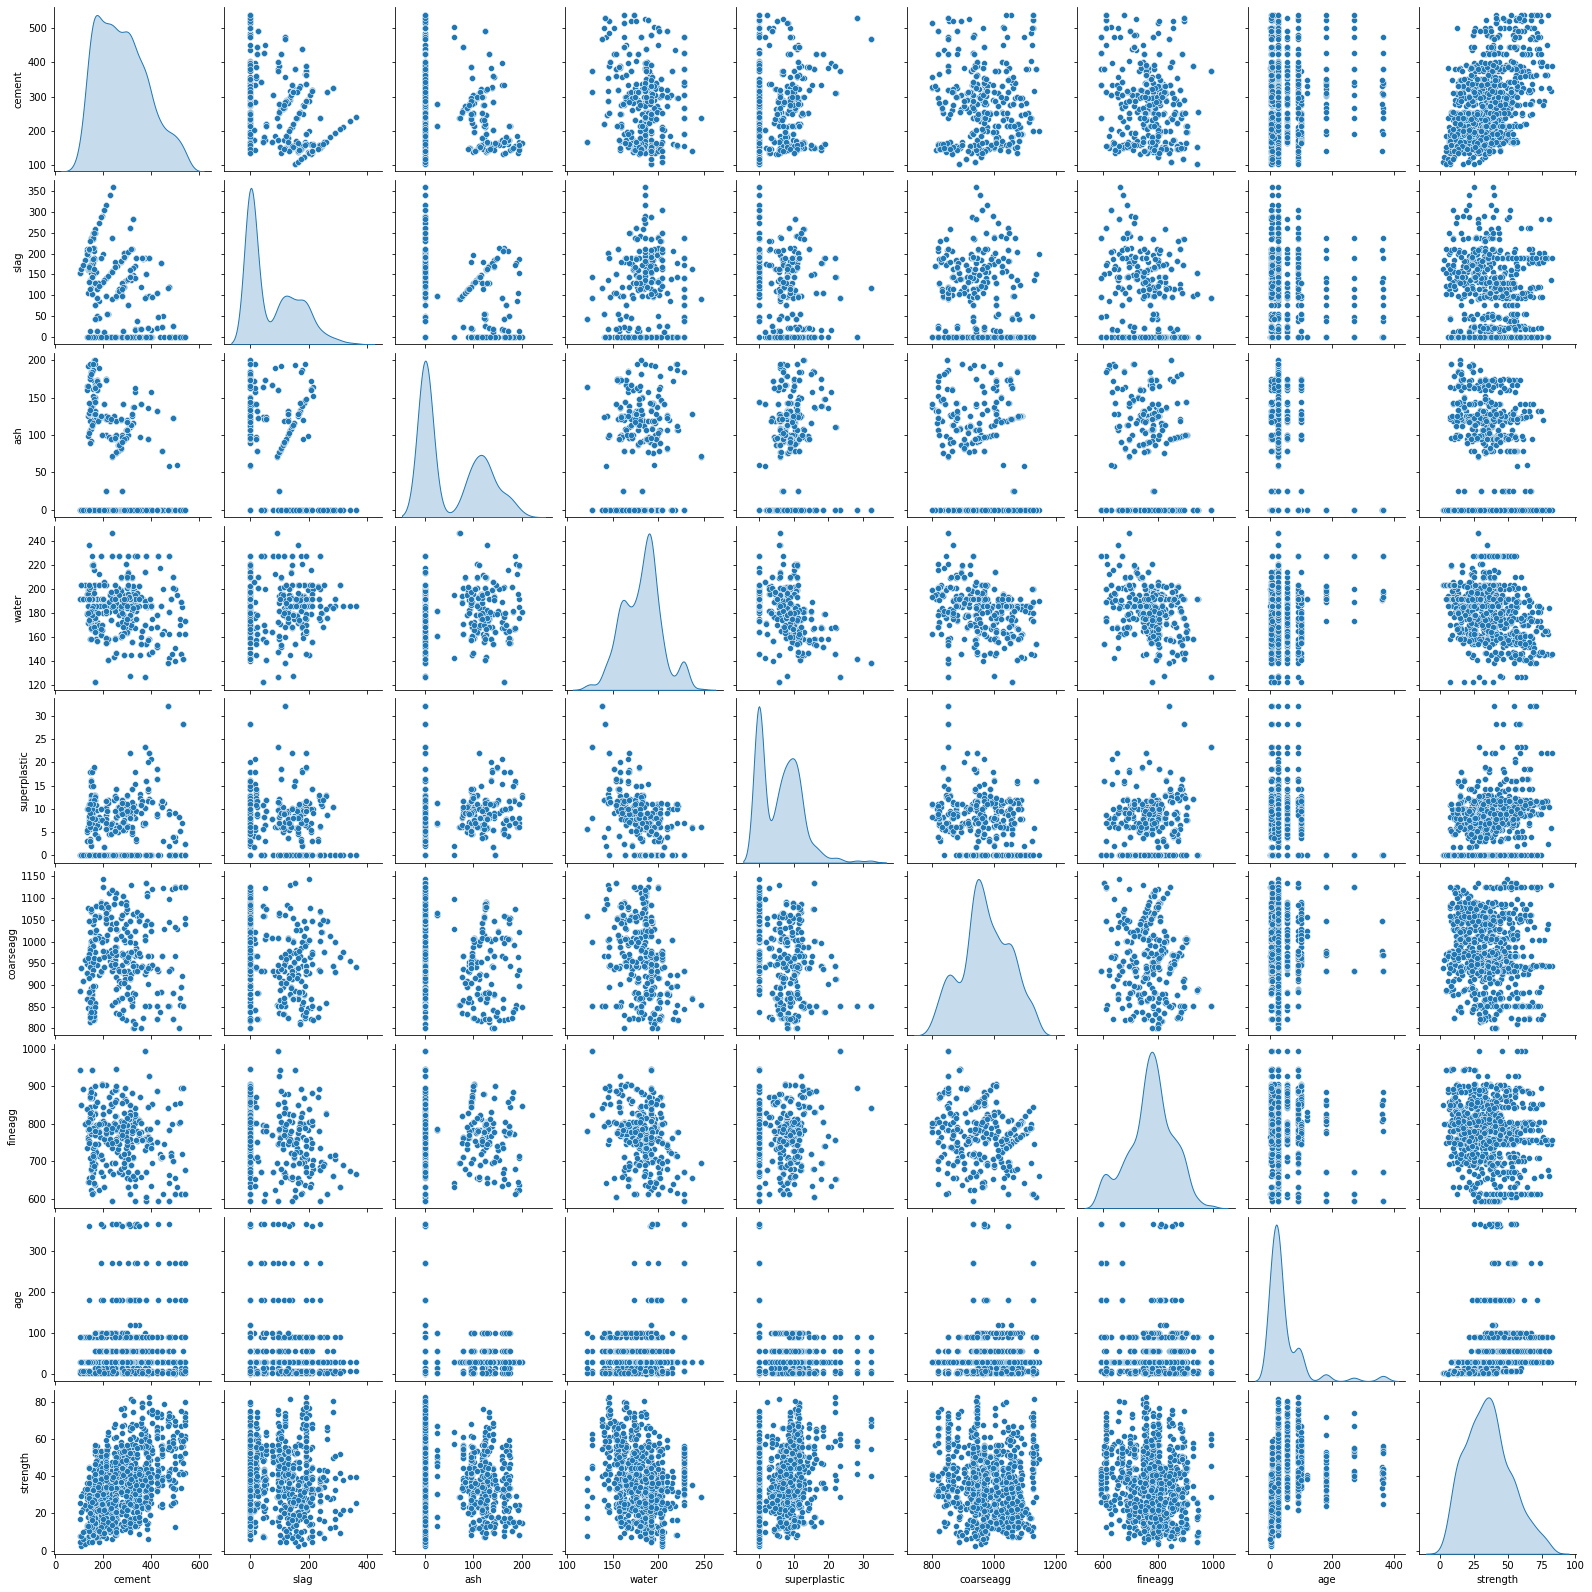

In [ ]:
sns.pairplot(data,diag_kind='kde')

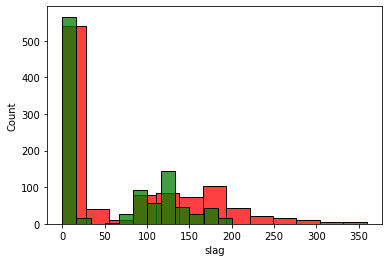

In [ ]:
sns.histplot(data['slag'],color='red')
sns.histplot(data['ash'],color='green')



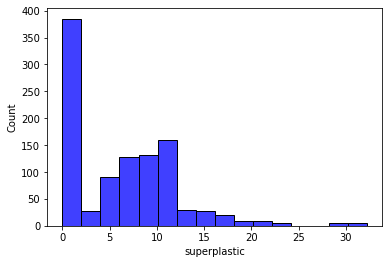

In [ ]:
sns.histplot(data['superplastic'],color='blue')

In [ ]:
#n=data[data['slag']==0 and data['ash']==0 and data['superplastic']==0].count()
#n=data[data['slag' and 'ash' and 'superplastic']==0]
#n=n.drop(['ash','slag','superplastic'],axis=1)
#n=data[data['ash']==0]
#n=data[data['slag']==0]
#n=data[data['superplastic']==0]
#n.describe().transpose()


In [ ]:
#sns.pairplot(n,diag_kind='kde')

# **Creating a linear model on the original data**

In [ ]:
scaled_data=data.apply(zscore)
#scaled_data.head(10)
X=scaled_data.loc[:,'cement':'age']
y=scaled_data.loc[:,'strength']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)
'''
model = svm.SVR()  
model.fit(X_train , y_train)
y_pred = model.predict(X_test)
sns.jointplot(x=y_test, y=y_pred, kind="reg", color="k");
print("Score of Linear Model : {:}".format(model.score(X_test,y_test)))  
'''

models=[svm.SVR(),LinearRegression()]
modelnames=["SVR","Linear","Ridge","Lasso"]
a=0
for model in models:
  model.fit(X_train,y_train)
  print("{:} \tScore => Training : {:.3f}\t  Test : {:.3f}".format(modelnames[a],model.score(X_train,y_train),model.score(X_test,y_test)))
  a+=1
  



SVR 	Score => Training : 0.878	  Test : 0.829
Linear 	Score => Training : 0.603	  Test : 0.634


##**Exploring the different clusters present in the data, It was evident from the pairplot analysis that the data has mixture of gaussians**


In [ ]:
from sklearn.cluster import KMeans

cluster_range = range( 2, 8 )   
cluster_errors = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 5)
  clusters.fit(scaled_data)
  labels = clusters.labels_
  centroids = clusters.cluster_centers_
  cluster_errors.append( clusters.inertia_ )
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df

,num_clusters,cluster_errors
0,2,7586.369824
1,3,6368.751485
2,4,5535.269204
3,5,4812.903962
4,6,4352.170216
5,7,4100.924581


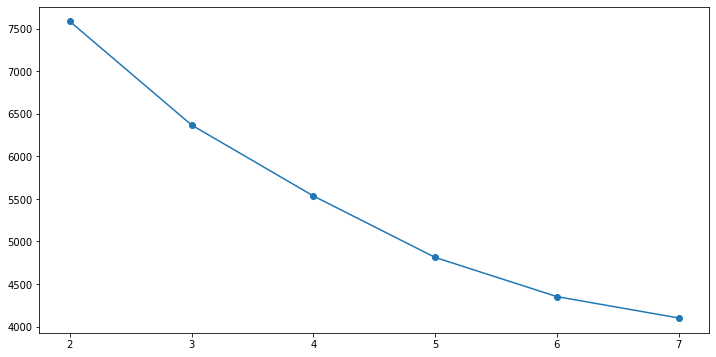

In [ ]:
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

## **Elbow plot indicates that there can be either 4 or 5 clusters**

## **Going ahead with 4 clusters for analysis**

In [ ]:
cluster = KMeans( n_clusters = 4, random_state = 1 )
cluster.fit(data)
centroids = cluster.cluster_centers_
prediction=cluster.predict(data)
data["GROUP"] = prediction 
data_cpy = data.copy(deep = True)  # Creating a mirror copy for later re-use instead of building repeatedly

centroid_df = pd.DataFrame(centroids, columns = list(data) )
centroid_df                                      # Creating a new column "GROUP" which will hold the cluster id of each record


,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength,GROUP
0,225.069118,11.414706,101.723824,173.505882,7.116176,1021.979706,811.321765,39.258824,29.652324,1.332268e-15
1,195.041606,180.366058,39.562044,191.387591,4.371898,952.677372,743.256569,38.956204,31.141460,1.000000e+00
2,369.950607,76.482186,35.157490,173.351417,9.724291,899.536842,807.972874,30.805668,45.388259,2.000000e+00
3,403.906509,23.197041,10.082840,193.871598,2.198225,1014.285207,696.549704,91.130178,41.816864,3.000000e+00


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tupl

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f536212d890>,
      dtype=object)

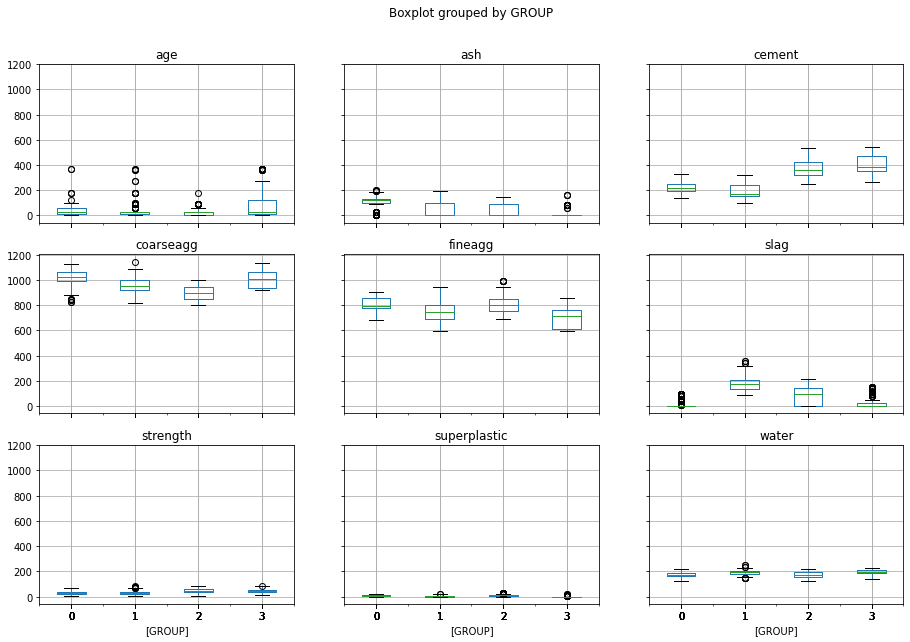

In [ ]:
import matplotlib.pylab as plt
data.boxplot(by = 'GROUP',  layout=(3,3), figsize=(15, 10))

## **There are outliers in the data clearly**
## **Replacing the outliers with median values for further analysis**


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tupl

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5364163690>,
      dtype=object)

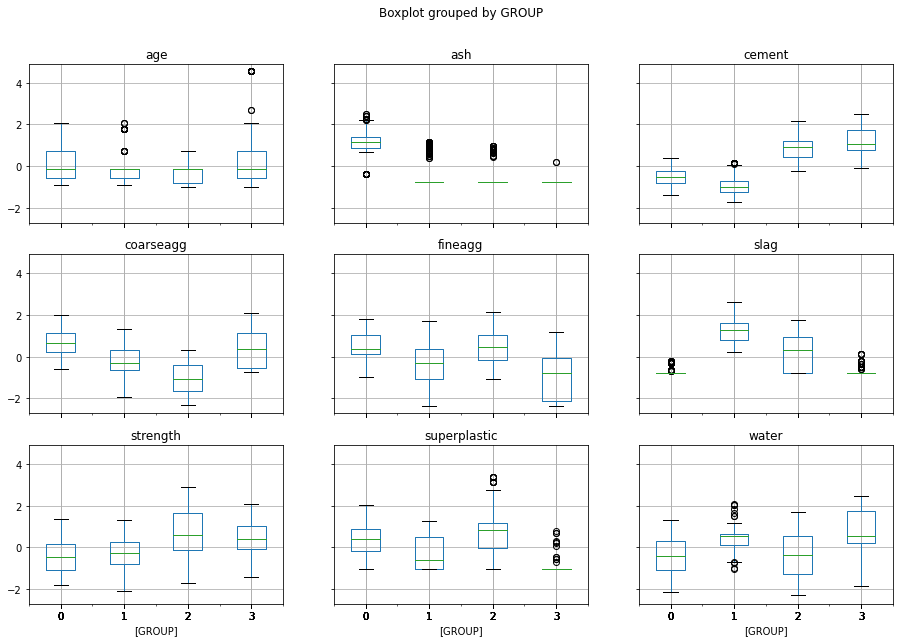

In [ ]:
def replace(group):
    median, std = group.median(), group.std()  #Get the median and the standard deviation of every group 
    outliers = (group - median).abs() > 2*std  # Subtract median from every member of each group. Take absolute values > 2std
    group[outliers] = group.median()     
    return group

data_corrected = (data.groupby('GROUP').transform(replace)) 
data_corrected_scaled=data_corrected.apply(zscore)
concat_data = data_corrected_scaled.join(pd.DataFrame(data['GROUP']))


concat_data.boxplot(by = 'GROUP',  layout=(3,3), figsize=(15, 10))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

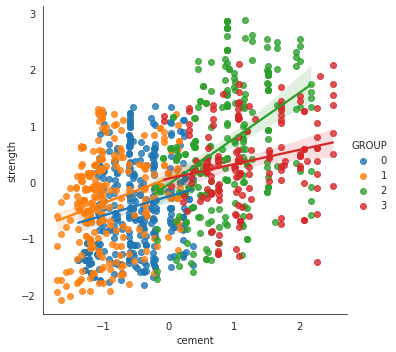

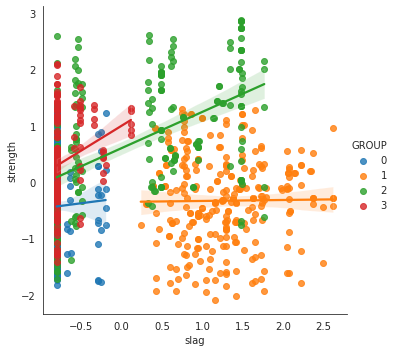

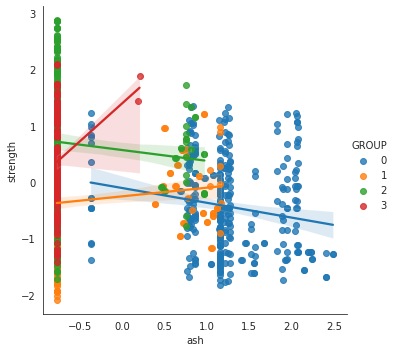

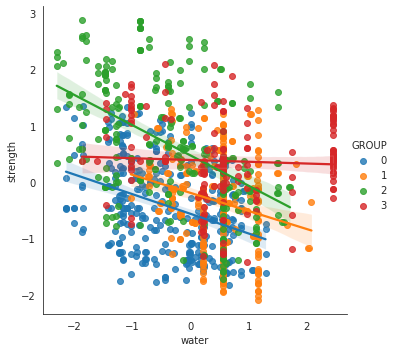

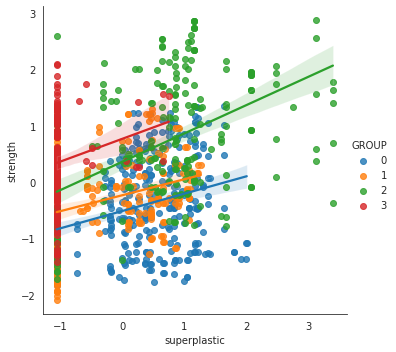

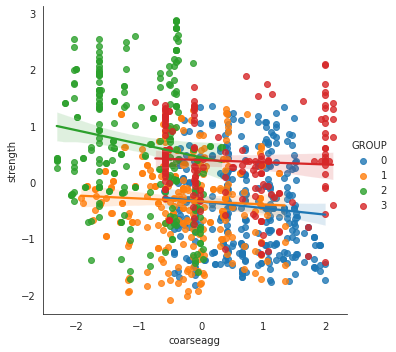

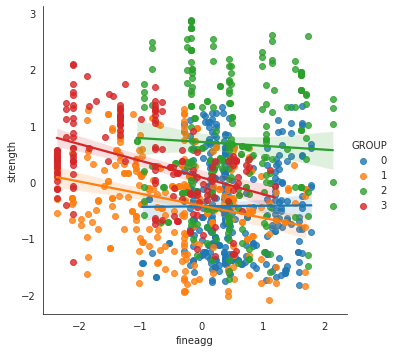

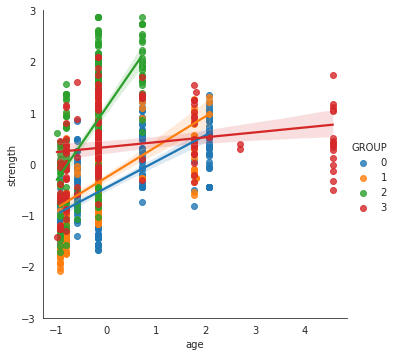

In [ ]:
variables =['cement','slag','ash','water','superplastic','coarseagg','fineagg','age']

for var in variables:
  with sns.axes_style("white"):
      plot=sns.lmplot(var,'strength',data=concat_data,hue='GROUP')
  
plot.set(ylim=(-3,3))
   

### **From the above plots it is clear that "slag" , "ash", "coarseagg", "superplastic" & "fineagg" are not good predictors of Strength**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axe

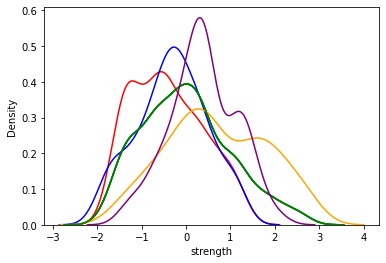

In [ ]:
G0 = concat_data[concat_data['GROUP']==0]
G1 = concat_data[concat_data['GROUP']==1]
G2 = concat_data[concat_data['GROUP']==2]
G3 = concat_data[concat_data['GROUP']==3]

groups=[G0,G1,G2,G3]
color =['red','blue','orange','purple']

a=0
for group in groups:
  sns.distplot(scaled_data['strength'],color='green',hist=False)
  sns.distplot(group['strength'],color=color[a],hist=False)
  a+=1


### **Breaking clusters into different datasets for further analysis**


In [ ]:
model=svm.SVR()

groups=[G0,G1,G2,G3]
a=0
for i in groups:
  _X=i.iloc[:,0:8]
  _y=i.iloc[:,8]
  _X_train,_X_test,_y_train,_y_test=train_test_split(_X,_y,test_size=0.30,random_state=0)
  model.fit(_X_train,_y_train)
  print("Score of GROUP {:} : {:}".format(a,model.score(_X_test,_y_test))) 
  a+=1 


Score of GROUP 0 : 0.7628000457720898
Score of GROUP 1 : 0.6865410632241074
Score of GROUP 2 : 0.6878967107642726
Score of GROUP 3 : 0.4729100269976442


### **There was no improvement in the prediction accuracy of the models even after clustering**

### **Exploring the importance of diffenrent attributes present in the data, so that we can try to eliminate few columns to see if what effects dimentionality reduction can have on the prediction accuracy**



In [ ]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=1, max_depth=4)

regressor.fit(X_train , y_train)
feature_importances = regressor.feature_importances_

feature_names = data.columns[0:-1]

top_k_idx = (feature_importances.argsort()[-8:][::-1])

for i in range(8):
  print("{:} => {:}".format(feature_names[i], feature_importances[i]))

#print("Score of Decision tree regressor : {:}".format(regressor.score(X_test,y_test)))


cement => 0.41710269890324153
slag => 0.04223791326049732
ash => 0.0
water => 0.13180539171376893
superplastic => 0.0043403597897615385
coarseagg => 0.0
fineagg => 0.0
age => 0.40451363633273063


## **From the above it is evident that only "cement", "water" & "age" are the significant features and followed by "slag" and "superplastic" which have slight importance**


##**This is in agreement with the inference made earlier**

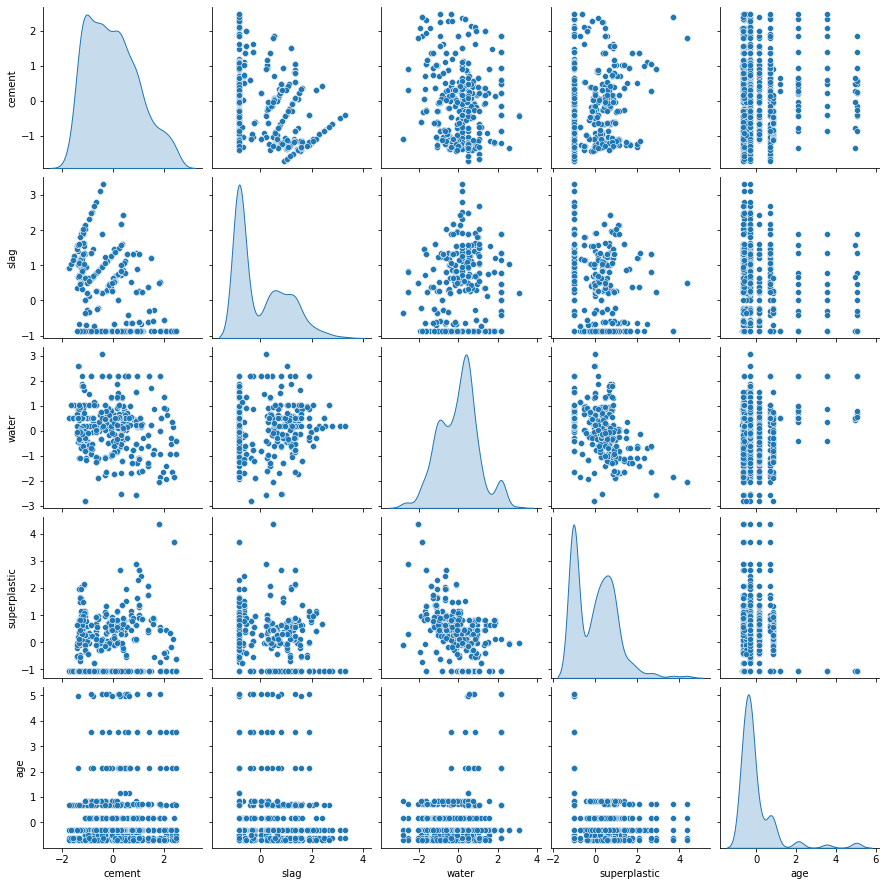

In [ ]:
X_reduced=scaled_data.drop(['ash','coarseagg','fineagg','strength'],axis=1)
sns.pairplot(X_reduced,diag_kind='kde')
#X_reduced=scaled_data.drop(['ash','coarseagg','fineagg','strength','GROUP'],axis=1)
#sns.pairplot(X_reduced,diag_kind='kde')


In [ ]:
model=svm.SVR()
#model=LinearRegression()
#model=Ridge()
#model=Lasso()

X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.30, random_state=1)

model.fit(X_train,y_train)

print("Score after dimentionality reduction : {:}".format(model.score(X_test,y_test)))

Score after dimentionality reduction : 0.843603445670056


## **There is a slight improvement in the score after dimentionality reduction, this confirms the inference made earlier regarding the important attributes**

## **Trying polynomial models for the original data**

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly= PolynomialFeatures(degree=2,interaction_only=True)

X_poly=poly.fit_transform(X)

X_poly.shape


(1030, 37)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.30, random_state=1)

models=[svm.SVR(),LinearRegression(),Ridge(alpha=0.3),Lasso(alpha=0.1)]
modelnames=["SVR","Linear","Ridge","Lasso"]
a=0
for model in models:
  model.fit(X_train,y_train)
  print("{:} \tScore => Training : {:.3f}\t  Test : {:.3f}".format(modelnames[a],model.score(X_train,y_train),model.score(X_test,y_test)))
  a+=1

SVR 	Score => Training : 0.873	  Test : 0.815
Linear 	Score => Training : 0.755	  Test : 0.744
Ridge 	Score => Training : 0.755	  Test : 0.744
Lasso 	Score => Training : 0.524	  Test : 0.513


## **Building polynomial model on data where insignificant attributes were droped**

In [ ]:
X_poly=poly.fit_transform(X_reduced)

X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.30, random_state=1)

models=[svm.SVR(),LinearRegression(),Ridge(alpha=0.3),Lasso(alpha=0.1)]
modelnames=["SVR","Linear","Ridge","Lasso"]
a=0
for model in models:
  model.fit(X_train,y_train)
  print("{:} \tScore => Training : {:.3f}\t  Test : {:.3f}".format(modelnames[a],model.score(X_train,y_train),model.score(X_test,y_test)))
  a+=1

SVR 	Score => Training : 0.872	  Test : 0.825
Linear 	Score => Training : 0.696	  Test : 0.680
Ridge 	Score => Training : 0.696	  Test : 0.680
Lasso 	Score => Training : 0.522	  Test : 0.519


## **From the above exercise the following can be understood :-**
## **1) There is no improvement in the Accuracy score by employing a polynomial model**
## **2) SVR algorithm is giving best accuracy on the original dataset as well as the lower dimentional dataset**

##**Hence,**
## **Going ahead with SVR algorithm for Hyperparameter tuning and will use lower dimentional data (X_reduced) for model building**




In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.30, random_state=1)

model=svm.SVR()

model.fit(X_train,y_train)

SVR()

Free parameters in this algorithm are " C " and " epsilon "

## **Performing Hyperparameter tuning**


In [ ]:
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.metrics import accuracy_score

parameter_grid= { 'C' : np.arange(0.1,1.0,0.1), 'epsilon': np.arange(0.1,1.0,0.1),'kernel':('rbf','linear', 'poly', 'sigmoid')}

#parameter_grid

In [ ]:
grid_search=GridSearchCV(model,parameter_grid,cv=10)
grid_search.fit(X_train,y_train)
print("Score : {:.3f} ,".format(grid_search.score(X_test,y_test)))
print("Best Combination of Parameters  :  {:}".format(grid_search.best_params_))

Score : 0.840 ,
Best Combination of Parameters  :  {'C': 0.9, 'epsilon': 0.1, 'kernel': 'rbf'}


## **The finetuned model is performing marginally better than the benchmark model built using original data**



In [ ]:
bestmodel=svm.SVR(C=0.9,epsilon=0.1)  

## **Performing Kfold Cross Validation in order to find accuracy range with 95% confidence level**

In [ ]:
from sklearn.model_selection import KFold
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.30, random_state=1)

n_folds=25
seed =1

kfold =KFold(n_splits=n_folds,random_state=seed)

results=cross_val_score(bestmodel,X_reduced,y,cv=kfold)
print(results)
mean_score=results.mean()
score_std=results.std()
print("Model Accuracy => Mean : {:.3f}% , Standard deviation : {:.3f}%".format(mean_score*100,score_std*100))

ValueError: ignored

In [ ]:
acc_range= [mean_score-1.96*score_std,mean_score+1.96*score_std]

print("Model performance will be in the range of  {:.3f}% to {:.3f}% @ 95% confidence level".format(acc_range[0]*100,acc_range[1]*100))

Model performance will be in the range of  74.363% to 94.283% @ 95% confidence level


## **With 95% confidence level the model accuracy will be approximately between 74 % to 94% as shown above**